## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
individual_mice=new_df["Mouse ID"].unique()
num_of_mice=len(individual_mice)
num_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()



array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = new_df.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
individual_mice_clean=clean_df["Mouse ID"].unique()
num_of_mice_clean=len(individual_mice_clean)
num_of_mice_clean

249

In [8]:
individual_mice_clean

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [10]:
regimen_mean = clean_df.groupby('Drug Regimen')
regimen_mean2 = regimen_mean['Tumor Volume (mm3)'].mean()
regimen_mean_df=pd.DataFrame(regimen_mean2)
regimen_mean_df = regimen_mean_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean"})
regimen_mean_df

,Tumor Volume Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [11]:
regimen_median = clean_df.groupby('Drug Regimen')
regimen_median2 = regimen_median['Tumor Volume (mm3)'].median()
regimen_median_df=pd.DataFrame(regimen_median2)
regimen_median_df = regimen_median_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Median"})
regimen_median_df

,Tumor Volume Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [12]:
regimen_variance = clean_df.groupby('Drug Regimen')
regimen_variance2 = regimen_variance['Tumor Volume (mm3)'].var()
regimen_variance_df=pd.DataFrame(regimen_variance2)
regimen_variance_df = regimen_variance_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
regimen_variance_df

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [13]:
regimen_standev = clean_df.groupby('Drug Regimen')
regimen_standev2 = regimen_standev['Tumor Volume (mm3)'].std()
regimen_standev_df=pd.DataFrame(regimen_standev2)
regimen_standev_df = regimen_standev_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"})
regimen_standev_df

,Tumor Volume Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [14]:
regimen_sem = clean_df.groupby('Drug Regimen')
regimen_sem2 = regimen_sem['Tumor Volume (mm3)'].sem()
regimen_sem_df=pd.DataFrame(regimen_sem2)
regimen_sem_df = regimen_sem_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM"})
regimen_sem_df

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [15]:
# summary_statistics=pd.DataFrame[["Drug Regimen", "Tumor Volume SEM", "Tumor Volume Standard Deviation"]]
# summary_statistics=pd.DataFrame(regimen_sem_df,regimen_standev_df)
# summary_statistics
#  regimen_mean_df,
summary_statistics = pd.merge(regimen_sem_df, regimen_standev_df, on = ["Drug Regimen"])
summary_statistics2=pd.merge(summary_statistics, regimen_variance_df, on = ["Drug Regimen"])
summary_statistics3=pd.merge(summary_statistics2, regimen_median_df, on=  ["Drug Regimen"])
summary_statistics_df= pd.merge(summary_statistics3, regimen_mean_df, on=  ["Drug Regimen"])
summary_statistics_df

,Tumor Volume SEM,Tumor Volume Standard Deviation,Tumor Volume Variance,Tumor Volume Median,Tumor Volume Mean
Drug Regimen,,,,,
Capomulin,0.329346,4.994774,24.947764,41.557809,40.675741
Ceftamin,0.469821,6.268188,39.290177,51.776157,52.591172
Infubinol,0.492236,6.567243,43.128684,51.820584,52.884795
Ketapril,0.603860,8.279709,68.553577,53.698743,55.235638
Naftisol,0.596466,8.134708,66.173479,52.509285,54.331565
Placebo,0.581331,7.821003,61.168083,52.288934,54.033581
Propriva,0.525862,6.568014,43.138803,50.909965,52.393463
Ramicane,0.320955,4.846308,23.486704,40.673236,40.216745
Stelasyn,0.573111,7.710419,59.450562,52.431737,54.233149


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.

dr_tp_df = clean_df.groupby("Drug Regimen")
dr_tp_df2 = dr_tp_df["Timepoint"].count()
drtpdf=pd.DataFrame(dr_tp_df2)
drtpdf


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


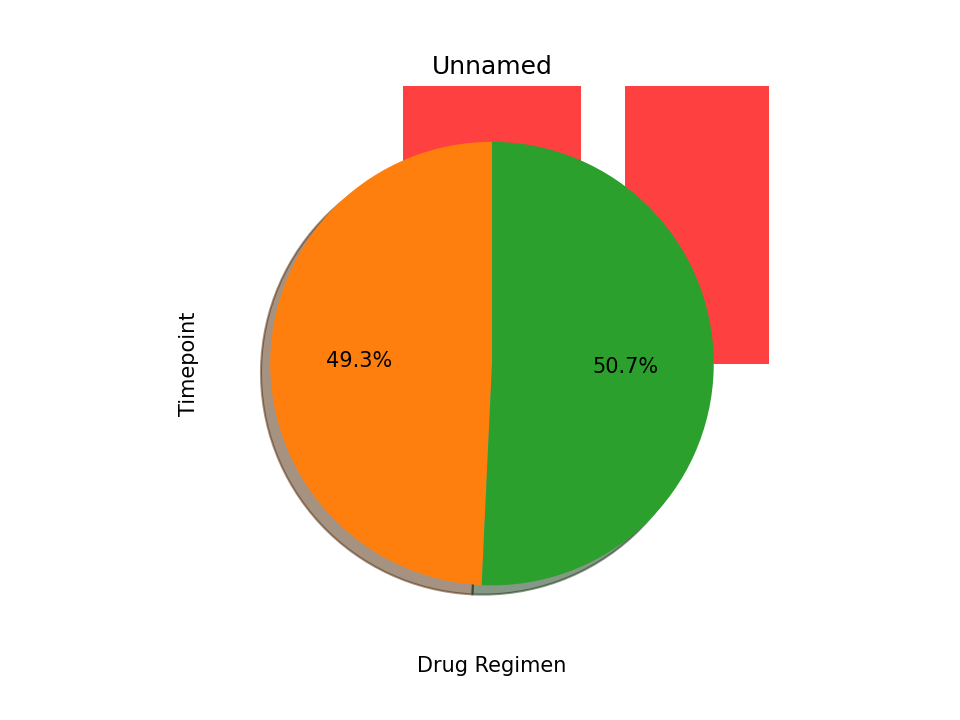

In [18]:
x_axis = np.arange(0,len(dr_tp_df["Drug Regimen"]))
timepoints = drtpdf["Timepoint"]
i=0

tick_locations = []
for x in x_axis:
    tick_locations.append(i)
    i+=1


plt.title("Unnamed")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")


plt.xlim(-1, len(x_axis))
plt.ylim(0, max(timepoints)+20)
plt.bar(x_axis, timepoints, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, dr_tp_df["Drug Regimen"].unique().values.tolist(), rotation="vertical")

plt.show()

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse=clean_df.groupby("Sex").count()
sex_mouse_df=pd.DataFrame(sex_mouse)
sex_mouse_df
sex=["female","male"]
mouseid=[930,958]
plt.pie(mouseid, autopct="%1.1f%%",shadow=True,startangle=90)
plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()
max_timepoint.reset_index()

max_timepoint_merged_df= max_timepoint.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
max_timepoint_merged_df



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_drugs_list:
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    four_drugs = max_timepoint_merged_df.loc(max_timepoint_merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)")
    tumor_vol_list.append(four_drugs)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
